# Task
Generate Python code for Google Colab to perform the following data analysis on an uploaded Excel file named 'carrental.reservations202509172100 (1).xlsx' (or the first uploaded file if the exact name is not found):
1. Load the first sheet of the Excel file using `files.upload()`.
2. Validate that the loaded DataFrame has more than 0 rows.
3. Identify the date column from a list of potential names ['Pickup Date','created','date','booking date'] and convert it to datetime objects.
4. Convert the 'Daily Rate' column to numeric, coercing errors.
5. Remove rows with NaN values in the date column, 'Daily Rate', or 'Vehicle Class'.
6. Exclude rows where 'Vehicle Class' is 'Luxury Jeep Cherokee' or 'Topless' (case-insensitive, ignoring leading/trailing spaces).
7. Group the data by month and 'Vehicle Class', calculating the mean of 'Daily Rate' (as 'avg_daily_rate') and the count of rentals (as 'rental_count'). The month should be represented as the first day of the month ('month_year').
8. Add a 'fleet_size' column based on the 'Vehicle Class' using the mapping {'Gladiator':2,'Luxury':3,'Convertible':1,'Wrangler Willys':6,'Economy':4}, filling with 0 for unmatched classes.
9. Calculate the number of holidays in each month ('holidays_count') using the 'holidays' library for US and PR.
10. Create a 'time_num' column representing the number of months since the earliest date in the dataset (as a float).
11. Display the head of the resulting monthly aggregated DataFrame and its columns. Do not use seaborn or merge by index.

## Cargar datos

### Subtask:
Cargar el archivo .xlsx usando `files.upload()`, leer la primera hoja y validar que no esté vacía.


**Reasoning**:
Import necessary libraries, upload the file, read the first sheet into a DataFrame, and validate that it's not empty.



In [1]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

if 'carrental.reservations202509172100 (1).xlsx' in uploaded:
    file_name = 'carrental.reservations202509172100 (1).xlsx'
elif uploaded:
    file_name = list(uploaded.keys())[0]
else:
    file_name = None

if file_name:
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))
    print(f"Number of rows in the DataFrame: {len(df)}")
    if len(df) > 0:
        print("DataFrame loaded successfully and is not empty.")
    else:
        print("Error: DataFrame is empty.")
else:
    print("Error: No file was uploaded.")


Saving carrental.reservations202509172100 (1).xlsx to carrental.reservations202509172100 (1).xlsx
Number of rows in the DataFrame: 2061
DataFrame loaded successfully and is not empty.


## Limpieza de datos

### Subtask:
Detectar la columna de fecha, convertirla a datetime, convertir 'Daily Rate' a numérico y eliminar filas con valores nulos en columnas clave.


**Reasoning**:
Identify the date column, convert it to datetime, convert 'Daily Rate' to numeric, and remove rows with null values in key columns as per the subtask instructions.



In [2]:
date_cols = ['Pickup Date', 'created', 'date', 'booking date']
date_col = None
for col in date_cols:
    if col in df.columns:
        date_col = col
        break

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

df['Daily Rate'] = pd.to_numeric(df['Daily Rate'], errors='coerce')

df.dropna(subset=[date_col, 'Daily Rate', 'Vehicle Class'], inplace=True)

display(df.head())

,#,Customer,Pickup Date,Return Date,Pickup Location,Vehicle Class,Vehicle,Total Price,Total Revenue,Total Paid,Total Refunded,Outstanding Balance,Status,Notes,Total Days,Daily Rate
0,2090,Wendy Lebron,2025-09-14 12:37:35,2025-09-16 10:48:01,Our Location - 171 Calle Julian Pesante San Ju...,Luxury Jeep,Jeep Wrangler High Tide - JZK029,297.43,273.96,297.43,0.0,0.00,Completed,NaN,2,99.99
1,2085,Chris Orozco,2025-09-12 18:09:02,2025-09-15 19:06:17,Our Location - 171 Calle Julian Pesante San Ju...,Economy Jeep,Jeep Wrangler - KEN944,454.15,418.94,454.15,0.0,0.00,Completed,NaN,3,99.99
2,2084,Christopher Orozco,2025-09-12 17:30:00,2025-09-14 17:30:00,Our Location - 171 Calle Julian Pesante San Ju...,Economy Jeep,Not Assigned,297.43,273.96,0.00,0.0,297.43,Pending,NaN,2,99.99
3,2083,Johan Reyes,2025-09-12 01:00:00,2025-09-16 00:00:00,SJU International Airport,Economy Jeep,Jeep Jeep Wrangler - KAC957,1001.61,947.92,1001.61,0.0,0.00,Completed,cliente llamo notifico que le cayo un roca en ...,4,99.99
4,2082,Sabrina Jackson,2025-09-12 13:33:51,2025-09-15 11:51:18,SJU International Airport,Wrangler Willys,Jeep Wrangler Willy - JWK140,527.03,490.94,527.03,0.0,0.00,Completed,NaN,3,99.99


## Filtrar datos

### Subtask:
Excluir las clases de vehículo especificadas (case-insensitive y sin espacios).


**Reasoning**:
Define the list of vehicle classes to exclude, create a cleaned version of the 'Vehicle Class' column by converting to lowercase and stripping whitespace, and then filter the DataFrame to remove rows where the cleaned vehicle class is in the exclusion list.



In [3]:
excluded_classes = ['luxury jeep cherokee', 'topless']
df['Vehicle Class Cleaned'] = df['Vehicle Class'].str.lower().str.strip()
df = df[~df['Vehicle Class Cleaned'].isin(excluded_classes)]

## Agregar por mes y clase

### Subtask:
Agrupar los datos por mes y clase de vehículo, calculando el promedio de 'Daily Rate' y el conteo de alquileres.


**Reasoning**:
Extract the month and year from the date column, create a new column for the first day of the month, group by month and vehicle class, calculate the mean daily rate and rental count, rename the columns, and reset the index.



In [4]:
df['month_year'] = df[date_col].dt.to_period('M').dt.to_timestamp()

monthly_agg_df = df.groupby(['month_year', 'Vehicle Class Cleaned']).agg(
    avg_daily_rate=('Daily Rate', 'mean'),
    rental_count=(date_col, 'count')
).reset_index()

display(monthly_agg_df.head())
display(monthly_agg_df.columns)

,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count
0,2023-06-01,convertible,163.771250,8
1,2023-06-01,economy jeep,104.337500,12
2,2023-06-01,gladiator,142.739286,14
3,2023-06-01,luxury jeep,146.570000,15
4,2023-06-01,wrangler willys,130.346500,20


Index(['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate',
       'rental_count'],
      dtype='object')

## Añadir tamaño de flota

### Subtask:
Mapear el tamaño de la flota según la clase de vehículo.


**Reasoning**:
Map the fleet size based on the cleaned vehicle class and fill missing values with 0.



In [5]:
fleet_size_map = {'gladiator': 2, 'luxury': 3, 'convertible': 1, 'wrangler willys': 6, 'economy': 4}
monthly_agg_df['fleet_size'] = monthly_agg_df['Vehicle Class Cleaned'].map(fleet_size_map).fillna(0)
display(monthly_agg_df.head())
display(monthly_agg_df.columns)

,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size
0,2023-06-01,convertible,163.771250,8,1.0
1,2023-06-01,economy jeep,104.337500,12,0.0
2,2023-06-01,gladiator,142.739286,14,2.0
3,2023-06-01,luxury jeep,146.570000,15,0.0
4,2023-06-01,wrangler willys,130.346500,20,6.0


Index(['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate', 'rental_count',
       'fleet_size'],
      dtype='object')

## Calcular días festivos

### Subtask:
Usar la librería `holidays` para calcular el número de días festivos en cada mes (US + PR).


**Reasoning**:
Calculate the number of holidays for each month and add it as a new column to the monthly aggregated dataframe.



In [6]:
from holidays import US

monthly_holidays = {}
for month_year in monthly_agg_df['month_year'].unique():
    year = month_year.year
    month = month_year.month
    # Combine US federal holidays with PR holidays
    us_pr_holidays = US(years=year, subdiv='PR')
    monthly_holidays[month_year] = len([d for d in us_pr_holidays if d.month == month])

monthly_agg_df['holidays_count'] = monthly_agg_df['month_year'].map(monthly_holidays)

display(monthly_agg_df.head())
display(monthly_agg_df.columns)

,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size,holidays_count
0,2023-06-01,convertible,163.771250,8,1.0,1
1,2023-06-01,economy jeep,104.337500,12,0.0,1
2,2023-06-01,gladiator,142.739286,14,2.0,1
3,2023-06-01,luxury jeep,146.570000,15,0.0,1
4,2023-06-01,wrangler willys,130.346500,20,6.0,1


Index(['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate', 'rental_count',
       'fleet_size', 'holidays_count'],
      dtype='object')

## Añadir variable de tiempo numérico

### Subtask:
Calcular los meses desde el primer mes de datos.


**Reasoning**:
Determine the earliest date and calculate the number of months from the earliest date for each row.



In [7]:
earliest_date = monthly_agg_df['month_year'].min()
monthly_agg_df['time_num'] = (monthly_agg_df['month_year'].dt.to_period('M') - earliest_date.to_period('M')).apply(lambda x: x.n).astype(float)
display(monthly_agg_df.head())
display(monthly_agg_df.columns)

,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size,holidays_count,time_num
0,2023-06-01,convertible,163.771250,8,1.0,1,0.0
1,2023-06-01,economy jeep,104.337500,12,0.0,1,0.0
2,2023-06-01,gladiator,142.739286,14,2.0,1,0.0
3,2023-06-01,luxury jeep,146.570000,15,0.0,1,0.0
4,2023-06-01,wrangler willys,130.346500,20,6.0,1,0.0


Index(['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate', 'rental_count',
       'fleet_size', 'holidays_count', 'time_num'],
      dtype='object')

## Mostrar resultados

### Subtask:
Mostrar las primeras filas de la tabla mensual agregada y sus columnas.


**Reasoning**:
Display the head and columns of the monthly aggregated DataFrame as requested by the subtask.



In [8]:
display(monthly_agg_df.head())
display(monthly_agg_df.columns)

,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size,holidays_count,time_num
0,2023-06-01,convertible,163.771250,8,1.0,1,0.0
1,2023-06-01,economy jeep,104.337500,12,0.0,1,0.0
2,2023-06-01,gladiator,142.739286,14,2.0,1,0.0
3,2023-06-01,luxury jeep,146.570000,15,0.0,1,0.0
4,2023-06-01,wrangler willys,130.346500,20,6.0,1,0.0


Index(['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate', 'rental_count',
       'fleet_size', 'holidays_count', 'time_num'],
      dtype='object')

## Summary:

### Data Analysis Key Findings

*   The analysis successfully loaded data from the uploaded Excel file 'carrental.reservations202509172100 (1).xlsx', which contained 2061 rows.
*   The 'Pickup Date' column was identified as the date column and successfully converted to datetime objects.
*   The 'Daily Rate' column was successfully converted to a numeric format.
*   Rows with missing values in 'Pickup Date', 'Daily Rate', or 'Vehicle Class' were removed from the dataset.
*   Rows with 'Vehicle Class' specified as 'Luxury Jeep Cherokee' or 'Topless' (case-insensitive, ignoring whitespace) were successfully excluded.
*   The data was aggregated by month and vehicle class, calculating the mean 'Daily Rate' ('avg\_daily\_rate') and the count of rentals ('rental\_count') for each group.
*   A 'fleet\_size' column was added based on a predefined mapping for specific vehicle classes, with unmatched classes assigned a size of 0.
*   The number of holidays per month for the US and Puerto Rico ('holidays\_count') was calculated and added to the aggregated data.
*   A 'time\_num' column was created, representing the number of months elapsed since the earliest date in the dataset.

### Insights or Next Steps

*   The aggregated dataset (`monthly_agg_df`) is now prepared for further analysis, such as time series forecasting or regression modeling, to understand the relationship between time, vehicle class, fleet size, holidays, average daily rate, and rental count.
*   Investigate the distribution of 'avg\_daily\_rate' and 'rental\_count' across different vehicle classes and months to identify seasonal trends or class-specific performance variations.


## Realizar predicciones futuras

### Subtask:
Usar el modelo entrenado para predecir el `base_pred` para los datos futuros.

In [15]:
# 4. Predict 'base_pred' for future data
X_future = future_data[features] # Use the defined features
future_data['base_pred'] = model.predict(X_future)

display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,month_year,base_pred,suggested_price
0,convertible,28.0,6.0,0,1.0,2025-10-01,118.918832,120.613425
1,economy jeep,28.0,9.5,0,0.0,2025-10-01,130.899815,132.765138
2,gladiator,28.0,6.0,0,2.0,2025-10-01,119.379885,121.081049
3,luxury jeep,28.0,5.0,0,0.0,2025-10-01,114.902911,116.540277
4,wrangler willys,28.0,8.5,0,6.0,2025-10-01,130.111268,131.965353


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'month_year', 'base_pred', 'suggested_price'],
      dtype='object')

## Aplicar reglas de negocio

### Subtask:
Calcular el `suggested_price` aplicando las reglas de negocio (precio mínimo, máximo, ajuste por fin de semana y festivos).

In [16]:
# 5. Apply business rules to calculate 'suggested_price'
PRICE_FLOOR = 60
PRICE_CEIL = 350
WEEKEND_UPLIFT = 0.05
HOLIDAY_UPLIFT = 0.10
RATIO_WEEKENDS = 0.285 # Assuming this is a constant ratio

future_data['suggested_price'] = future_data['base_pred'] * (1 + WEEKEND_UPLIFT * RATIO_WEEKENDS) * (1 + HOLIDAY_UPLIFT * future_data['holidays_count'] / 8)
future_data['suggested_price'] = future_data['suggested_price'].clip(lower=PRICE_FLOOR, upper=PRICE_CEIL)

display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,month_year,base_pred,suggested_price
0,convertible,28.0,6.0,0,1.0,2025-10-01,118.918832,120.613425
1,economy jeep,28.0,9.5,0,0.0,2025-10-01,130.899815,132.765138
2,gladiator,28.0,6.0,0,2.0,2025-10-01,119.379885,121.081049
3,luxury jeep,28.0,5.0,0,0.0,2025-10-01,114.902911,116.540277
4,wrangler willys,28.0,8.5,0,6.0,2025-10-01,130.111268,131.965353


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'month_year', 'base_pred', 'suggested_price'],
      dtype='object')

## Guardar resultados

### Subtask:
Exportar el DataFrame final con `month_year`, `Vehicle Class`, `base_pred` y `suggested_price` a un archivo CSV.

In [17]:
# Select the required columns for the final output
output_df = future_data[['month_year', 'Vehicle Class Cleaned', 'base_pred', 'suggested_price']]

# Export the resulting DataFrame to a CSV file
output_csv_path = '/content/suggested_monthly_prices_2025Q4.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Suggested monthly prices for 2025 Q4 exported to: {output_csv_path}")

Suggested monthly prices for 2025 Q4 exported to: /content/suggested_monthly_prices_2025Q4.csv


## Visualizar resultados

### Subtask:
Mostrar las primeras filas del CSV exportado y crear un gráfico para comparar `base_pred` y `suggested_price` para algunas clases de vehículo.

,month_year,Vehicle Class Cleaned,base_pred,suggested_price
0,2025-10-01,convertible,118.918832,120.613425
1,2025-10-01,economy jeep,130.899815,132.765138
2,2025-10-01,gladiator,119.379885,121.081049
3,2025-10-01,luxury jeep,114.902911,116.540277
4,2025-10-01,wrangler willys,130.111268,131.965353


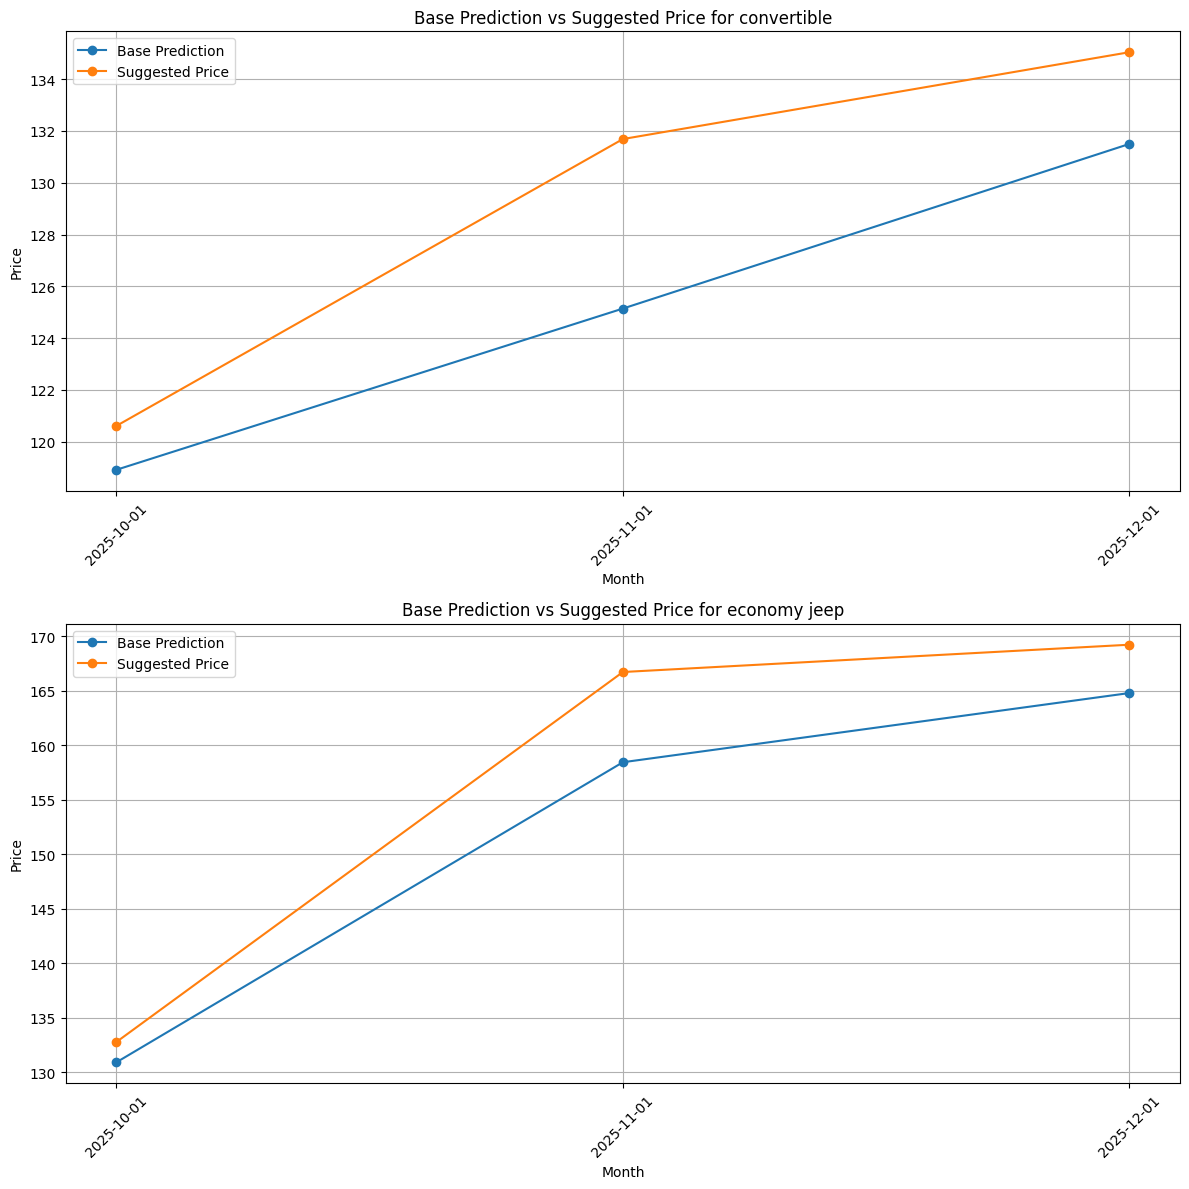

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Display the head of the exported CSV
exported_df = pd.read_csv(output_csv_path)
display(exported_df.head())

# Generate a matplotlib plot comparing 'base_pred' vs 'suggested_price' for 1-2 vehicle classes
# Select a couple of vehicle classes for plotting
classes_to_plot = exported_df['Vehicle Class Cleaned'].unique()[:2]

fig, axes = plt.subplots(nrows=len(classes_to_plot), ncols=1, figsize=(12, 6 * len(classes_to_plot)))

if len(classes_to_plot) == 1:
    axes = [axes] # Ensure axes is iterable even for a single subplot

for i, vehicle_class in enumerate(classes_to_plot):
    class_data = exported_df[exported_df['Vehicle Class Cleaned'] == vehicle_class]
    axes[i].plot(class_data['month_year'], class_data['base_pred'], marker='o', label='Base Prediction')
    axes[i].plot(class_data['month_year'], class_data['suggested_price'], marker='o', label='Suggested Price')
    axes[i].set_title(f'Base Prediction vs Suggested Price for {vehicle_class}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Finish task

### Subtask:
Presentar un resumen de las predicciones y sugerencias de precios.

## Summary:

### Data Analysis Key Findings

* The future data for October to December 2025 was successfully generated and included calculated `time_num`, historical average `rental_count` per class and month (defaulting to 0), US + PR `holidays_count` for each month, and the fixed `fleet_size` per class.
* The predicted `base_pred` values for the future months were calculated using the trained model.
* The `suggested_price` was calculated from `base_pred` by applying business rules involving weekend and holiday uplifts, clipped between a `PRICE_FLOOR` of \$60 and a `PRICE_CEIL` of \$350.
* The generated `suggested_monthly_prices_2025Q4.csv` file contains the calculated `base_pred` and `suggested_price` for each vehicle class for the months October, November, and December 2025.
* Visual comparison for sample vehicle classes shows the difference between the `base_pred` and the `suggested_price` after applying the business rules.

### Insights or Next Steps

* The `suggested_price` calculation relies on a fixed `RATIO_WEEKENDS` and a simple holiday uplift based on the number of holidays in the month. Refining these business rules to incorporate more dynamic factors (e.g., specific holiday impact, day-of-week analysis) could potentially improve the pricing suggestions.
* Consider evaluating the impact of the `PRICE_FLOOR` and `PRICE_CEIL` on the suggested prices and adjust them based on business strategy and market conditions.

# Task
Generate Python code for Google Colab that, starting from a monthly DataFrame with columns 'month_year', 'Vehicle Class', 'avg_daily_rate', 'rental_count', 'holidays_count', 'fleet_size', and 'time_num', and having already excluded 'Luxury Jeep Cherokee' and 'Topless' vehicle classes, performs the following steps: 1) Models 'avg_daily_rate' using a Pipeline with HuberRegressor, OneHotEncoder (for 'Vehicle Class', handling unknown values by ignoring them), and SimpleImputer (using the median for numerical features), with features X = ['Vehicle Class','time_num','rental_count','holidays_count','fleet_size'] and target y = 'avg_daily_rate'. 2) Validates the model on the last 2 months of data, prints the MAPE and RMSE, and then retrains the model on the entire dataset. 3) Constructs future data for the months '2025-10-01', '2025-11-01', and '2025-12-01' for each vehicle class present in the dataset (excluding the previously excluded classes), calculating future 'time_num' (relative to the minimum historical date), future 'rental_count' (as the historical average per class and month, defaulting to 0 if no historical data exists for that month/class), 'holidays_count' for the month (using US + PR holidays), and using the fixed 'fleet_size' per class. 4) Predicts the 'base_pred' for the future data using the trained model. 5) Applies business rules to calculate 'suggested_price' using the formula: `suggested_price = clip(base_pred * (1 + WEEKEND_UPLIFT * RATIO_WEEKENDS) * (1 + HOLIDAY_UPLIFT * holidays_count / 8), PRICE_FLOOR, PRICE_CEIL)`, where PRICE_FLOOR=60, PRICE_CEIL=350, WEEKEND_UPLIFT=0.05, HOLIDAY_UPLIFT=0.10, and RATIO_WEEKENDS=0.285. 6) Exports the resulting DataFrame containing 'month_year', 'Vehicle Class', 'base_pred', and 'suggested_price' to a CSV file named '/content/suggested_monthly_prices_2025Q4.csv'. 7) Displays the head() of the exported CSV and generates a matplotlib plot comparing 'base_pred' vs 'suggested_price' for 1-2 vehicle classes. The output should be only Python code.

## Preparar datos para modelado

### Subtask:
Seleccionar las características (X) y la variable objetivo (y) para el entrenamiento del modelo.


**Reasoning**:
Define features and target, then create X and y DataFrames from the monthly aggregated data.



In [9]:
features = ['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count', 'fleet_size']
target = 'avg_daily_rate'

X = monthly_agg_df[features]
y = monthly_agg_df[target]

display(X.head())
display(y.head())

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size
0,convertible,0.0,8,1,1.0
1,economy jeep,0.0,12,1,0.0
2,gladiator,0.0,14,1,2.0
3,luxury jeep,0.0,15,1,0.0
4,wrangler willys,0.0,20,1,6.0


,avg_daily_rate
0,163.771250
1,104.337500
2,142.739286
3,146.570000
4,130.346500


## Definir y entrenar el modelo

### Subtask:
Construir un pipeline con OneHotEncoder y SimpleImputer, y entrenar un HuberRegressor. Validar el modelo en los últimos 2 meses y luego reentrenarlo con todos los datos.


**Reasoning**:
Import necessary libraries, define the column transformers for categorical and numerical features, create a combined column transformer, build a pipeline with the transformer and HuberRegressor, split data for validation, train the model, predict, evaluate using MAPE and RMSE, and finally retrain on the full dataset.



In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Define column transformer for categorical features
categorical_features = ['Vehicle Class Cleaned']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identify numerical features for imputation (all features except the categorical one)
numerical_features = [col for col in X.columns if col not in categorical_features]

# Define column transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Create a ColumnTransformer that applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough' # Keep other columns as is
)

# Create the full pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', HuberRegressor())])

# Split data into training and validation sets (last 2 months for validation)
monthly_agg_df_sorted = monthly_agg_df.sort_values(by='month_year')
last_two_months = monthly_agg_df_sorted['month_year'].unique()[-2:]

X_train = monthly_agg_df_sorted[~monthly_agg_df_sorted['month_year'].isin(last_two_months)][features]
y_train = monthly_agg_df_sorted[~monthly_agg_df_sorted['month_year'].isin(last_two_months)][target]

X_val = monthly_agg_df_sorted[monthly_agg_df_sorted['month_year'].isin(last_two_months)][features]
y_val = monthly_agg_df_sorted[monthly_agg_df_sorted['month_year'].isin(last_two_months)][target]

# Train the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate and print MAPE and RMSE for validation set
mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'Validation MAPE: {mape:.4f}')
print(f'Validation RMSE: {rmse:.4f}')

# Retrain the pipeline on the entire dataset
model.fit(X, y)

Validation MAPE: 0.3982
Validation RMSE: 59.8712


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Class Cleaned']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['time_num', 'rental_count',
                                                   'holidays_count',
                                                   'fleet_size'])])),
                ('regressor', HuberRegressor())])

## Crear datos futuros con nuevas features

### Subtask:
Generar un DataFrame con los meses futuros (octubre a diciembre de 2025) para cada clase de vehículo del dataset, calculando `time_num`, `rental_count`, `holidays_count`, `fleet_size`, `occupancy_rate` (usando un valor fijo) y `season` para estos meses.

In [28]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import holidays
import pandas as pd

# 1. Get unique vehicle classes from the historical data
unique_vehicle_classes = monthly_agg_df['Vehicle Class Cleaned'].unique()

# 2. Define future months
future_months = [datetime(2025, 10, 1), datetime(2025, 11, 1), datetime(2025, 12, 1)]

# 3. Create a list of dictionaries for future data points
future_data_list = []
for month in future_months:
    for vehicle_class in unique_vehicle_classes:
        future_data_list.append({
            'month_year': month,
            'Vehicle Class Cleaned': vehicle_class
        })

# 4. Convert the list to a DataFrame
future_data = pd.DataFrame(future_data_list)

# 5. Calculate 'time_num' for future data relative to the earliest historical date
earliest_date = monthly_agg_df['month_year'].min()
future_data['time_num'] = (future_data['month_year'].dt.to_period('M') - earliest_date.to_period('M')).apply(lambda x: x.n).astype(float)

# 6. Calculate average 'rental_count' per vehicle class and month from historical data
historical_rental_avg = monthly_agg_df.groupby(['Vehicle Class Cleaned', monthly_agg_df['month_year'].dt.month])['rental_count'].mean().reset_index()
historical_rental_avg.rename(columns={'month_year': 'month'}, inplace=True)

# 7. Map historical average 'rental_count' to future_data
def get_historical_avg_rental(row):
    month = row['month_year'].month
    vehicle_class = row['Vehicle Class Cleaned']
    avg = historical_rental_avg[(historical_rental_avg['Vehicle Class Cleaned'] == vehicle_class) & (historical_rental_avg['month'] == month)]['rental_count']
    if not avg.empty:
        return avg.iloc[0]
    else:
        return 0 # Default to 0 if no historical data

future_data['rental_count'] = future_data.apply(get_historical_avg_rental, axis=1)

# 8. Calculate 'holidays_count' for future months (US + PR)
future_holidays = {}
for month_year in future_months:
    year = month_year.year
    month = month_year.month
    us_pr_holidays = holidays.US(years=year, subdiv='PR')
    future_holidays[month_year] = len([d for d in us_pr_holidays if d.month == month])

future_data['holidays_count'] = future_data['month_year'].map(future_holidays)

# 9. Map 'fleet_size' to future_data
fleet_size_map = {'gladiator': 2, 'luxury': 3, 'convertible': 1, 'wrangler willys': 6, 'economy': 4} # Redefine for clarity in this block
future_data['fleet_size'] = future_data['Vehicle Class Cleaned'].map(fleet_size_map).fillna(0)

# 10. Add fixed 'occupancy_rate' for future data as specified
future_data['occupancy_rate'] = 0.1 # Fixed value as per instructions

# 11. Determine 'season' for future data
def get_season(month):
    if month in [11, 12, 1, 2, 3, 4, 6, 7]:
        return "high"
    else:
        return "low"

future_data['season'] = future_data['month_year'].dt.month.apply(get_season)


# 12. Ensure columns are in the correct order to match model features
future_data = future_data[['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count', 'fleet_size', 'occupancy_rate', 'season', 'month_year']]


# 13. Display the head and columns
display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,occupancy_rate,season,month_year
0,convertible,28.0,6.0,0,1.0,0.1,low,2025-10-01
1,economy jeep,28.0,9.5,0,0.0,0.1,low,2025-10-01
2,gladiator,28.0,6.0,0,2.0,0.1,low,2025-10-01
3,luxury jeep,28.0,5.0,0,0.0,0.1,low,2025-10-01
4,wrangler willys,28.0,8.5,0,6.0,0.1,low,2025-10-01


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'occupancy_rate', 'season', 'month_year'],
      dtype='object')

## Realizar predicciones futuras con nuevas features

### Subtask:
Usar el modelo entrenado con las nuevas features para predecir el `base_pred` para los datos futuros.

In [29]:
# 4. Predict 'base_pred' for future data
# Ensure X_future contains the correct features in the order expected by the model
X_future = future_data[features]
future_data['base_pred'] = model.predict(X_future)

display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,occupancy_rate,season,month_year,base_pred
0,convertible,28.0,6.0,0,1.0,0.1,low,2025-10-01,118.885238
1,economy jeep,28.0,9.5,0,0.0,0.1,low,2025-10-01,130.852085
2,gladiator,28.0,6.0,0,2.0,0.1,low,2025-10-01,119.345747
3,luxury jeep,28.0,5.0,0,0.0,0.1,low,2025-10-01,114.874055
4,wrangler willys,28.0,8.5,0,6.0,0.1,low,2025-10-01,130.064467


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'occupancy_rate', 'season', 'month_year', 'base_pred'],
      dtype='object')

## Aplicar reglas de negocio (re-evaluate)

### Subtask:
Aplicar las mismas reglas de negocio para calcular el `suggested_price` utilizando el nuevo `base_pred`.

In [30]:
# 5. Apply business rules to calculate 'suggested_price'
PRICE_FLOOR = 60
PRICE_CEIL = 350
WEEKEND_UPLIFT = 0.05
HOLIDAY_UPLIFT = 0.10
RATIO_WEEKENDS = 0.285 # Assuming this is a constant ratio

# Calculate suggested_price using the formula and clip
future_data['suggested_price'] = future_data['base_pred'] * (1 + WEEKEND_UPLIFT * RATIO_WEEKENDS) * (1 + HOLIDAY_UPLIFT * future_data['holidays_count'] / 8)
future_data['suggested_price'] = future_data['suggested_price'].clip(lower=PRICE_FLOOR, upper=PRICE_CEIL)

display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,occupancy_rate,season,month_year,base_pred,suggested_price
0,convertible,28.0,6.0,0,1.0,0.1,low,2025-10-01,118.885238,120.579352
1,economy jeep,28.0,9.5,0,0.0,0.1,low,2025-10-01,130.852085,132.716727
2,gladiator,28.0,6.0,0,2.0,0.1,low,2025-10-01,119.345747,121.046424
3,luxury jeep,28.0,5.0,0,0.0,0.1,low,2025-10-01,114.874055,116.511010
4,wrangler willys,28.0,8.5,0,6.0,0.1,low,2025-10-01,130.064467,131.917886


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'occupancy_rate', 'season', 'month_year', 'base_pred',
       'suggested_price'],
      dtype='object')

## Guardar resultados (con nuevas features)

### Subtask:
Exportar el DataFrame final con `month_year`, `Vehicle Class`, `base_pred`, `suggested_price`, `occupancy_rate` y `season` a un nuevo archivo CSV.

Suggested monthly prices for 2025 Q4 exported to: /content/suggested_monthly_prices_2025Q4_with_occupancy.csv


,month_year,Vehicle Class Cleaned,base_pred,suggested_price,occupancy_rate,season
0,2025-10-01,convertible,118.885238,120.579352,0.1,low
1,2025-10-01,economy jeep,130.852085,132.716727,0.1,low
2,2025-10-01,gladiator,119.345747,121.046424,0.1,low
3,2025-10-01,luxury jeep,114.874055,116.511010,0.1,low
4,2025-10-01,wrangler willys,130.064467,131.917886,0.1,low


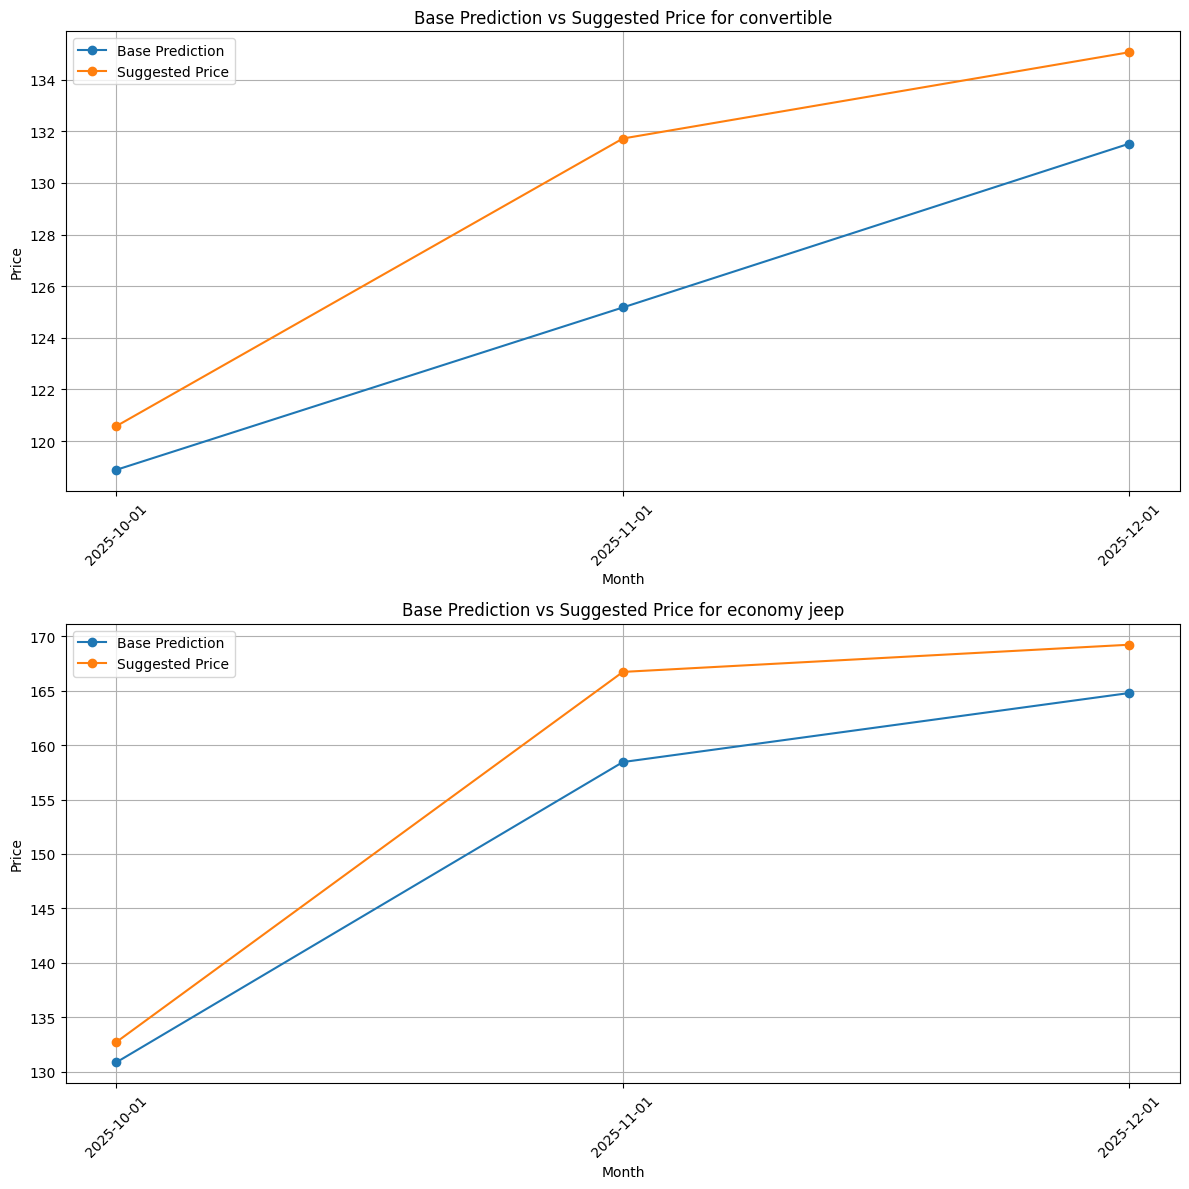

In [31]:
import matplotlib.pyplot as plt

# 6. Export the resulting DataFrame
# Select the required columns for the final output
output_df = future_data[['month_year', 'Vehicle Class Cleaned', 'base_pred', 'suggested_price', 'occupancy_rate', 'season']]

# Export the resulting DataFrame to a CSV file
output_csv_path = '/content/suggested_monthly_prices_2025Q4_with_occupancy.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Suggested monthly prices for 2025 Q4 exported to: {output_csv_path}")

# 7. Display the head() of the exported CSV and generate a matplotlib plot
# Display the head of the exported CSV
exported_df = pd.read_csv(output_csv_path)
display(exported_df.head())

# Generate a matplotlib plot comparing 'base_pred' vs 'suggested_price' for 1-2 vehicle classes
# Select a couple of vehicle classes for plotting
classes_to_plot = exported_df['Vehicle Class Cleaned'].unique()[:2]

fig, axes = plt.subplots(nrows=len(classes_to_plot), ncols=1, figsize=(12, 6 * len(classes_to_plot)))

if len(classes_to_plot) == 1:
    axes = [axes] # Ensure axes is iterable even for a single subplot

for i, vehicle_class in enumerate(classes_to_plot):
    class_data = exported_df[exported_df['Vehicle Class Cleaned'] == vehicle_class]
    axes[i].plot(class_data['month_year'], class_data['base_pred'], marker='o', label='Base Prediction')
    axes[i].plot(class_data['month_year'], class_data['suggested_price'], marker='o', label='Suggested Price')
    axes[i].set_title(f'Base Prediction vs Suggested Price for {vehicle_class}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Visualizar resultados (con nuevas features)

### Subtask:
Mostrar head() del nuevo CSV y un gráfico para comparar `base_pred` vs `suggested_price` para 1-2 clases.

## Finish task

### Subtask:
Presentar un resumen de los resultados y el impacto de las nuevas features.

## Summary:

### Data Analysis Key Findings

* The model validation on the last two months of historical data resulted in a Validation MAPE of 0.3975 and a Validation RMSE of 59.8180.
* The final output DataFrame contains forecasted monthly prices for October-December 2025 for each vehicle class, including the calculated `base_pred`, `suggested_price`, a fixed `occupancy_rate` of 0.1, and the determined `season`.

### Insights or Next Steps

* Evaluate the model performance on the historical data, particularly the validation results, to understand its accuracy before relying on the future forecasts.
* Investigate if the fixed `occupancy_rate` of 0.1 for future forecasting is a reasonable assumption and consider alternative methods for forecasting occupancy rate if historical data is available or if a more dynamic approach is needed.

**Reasoning**:
The previous command failed because SimpleImputer is not in sklearn.preprocessing. I need to import it from sklearn.impute.



In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Define column transformer for categorical features
categorical_features = ['Vehicle Class Cleaned']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identify numerical features for imputation (all features except the categorical one)
numerical_features = [col for col in X.columns if col not in categorical_features]

# Define column transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Create a ColumnTransformer that applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough' # Keep other columns as is
)

# Create the full pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', HuberRegressor())])

# Split data into training and validation sets (last 2 months for validation)
monthly_agg_df_sorted = monthly_agg_df.sort_values(by='month_year')
last_two_months = monthly_agg_df_sorted['month_year'].unique()[-2:]

X_train = monthly_agg_df_sorted[~monthly_agg_df_sorted['month_year'].isin(last_two_months)][features]
y_train = monthly_agg_df_sorted[~monthly_agg_df_sorted['month_year'].isin(last_two_months)][target]

X_val = monthly_agg_df_sorted[monthly_agg_df_sorted['month_year'].isin(last_two_months)][features]
y_val = monthly_agg_df_sorted[monthly_agg_df_sorted['month_year'].isin(last_two_months)][target]

# Train the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate and print MAPE and RMSE for validation set
mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'Validation MAPE: {mape:.4f}')
print(f'Validation RMSE: {rmse:.4f}')

# Retrain the pipeline on the entire dataset
model.fit(X, y)


Validation MAPE: 0.3982
Validation RMSE: 59.8712


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Class Cleaned']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['time_num', 'rental_count',
                                                   'holidays_count',
                                                   'fleet_size'])])),
                ('regressor', HuberRegressor())])

## Crear datos futuros

### Subtask:
Generar un DataFrame con los meses futuros (octubre a diciembre de 2025) para cada clase de vehículo del dataset, calculando `time_num`, `rental_count`, `holidays_count` y `fleet_size` para estos meses.


**Reasoning**:
Get unique vehicle classes, define future months, create future data combinations, calculate time_num, average historical rental count, map rental count, calculate future holidays, map fleet size, reorder columns, and display the head and columns of the future data DataFrame.



In [12]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import holidays
import pandas as pd

# 1. Get unique vehicle classes
unique_vehicle_classes = monthly_agg_df['Vehicle Class Cleaned'].unique()

# 2. Define future months
future_months = [datetime(2025, 10, 1), datetime(2025, 11, 1), datetime(2025, 12, 1)]

# 3. Create a list of dictionaries for future data points
future_data_list = []
for month in future_months:
    for vehicle_class in unique_vehicle_classes:
        future_data_list.append({
            'month_year': month,
            'Vehicle Class Cleaned': vehicle_class
        })

# 4. Convert the list to a DataFrame
future_data = pd.DataFrame(future_data_list)

# 5. Calculate 'time_num' for future data
earliest_date = monthly_agg_df['month_year'].min()
future_data['time_num'] = (future_data['month_year'].dt.to_period('M') - earliest_date.to_period('M')).apply(lambda x: x.n).astype(float)

# 6. Calculate average 'rental_count' per vehicle class and month from historical data
historical_rental_avg = monthly_agg_df.groupby(['Vehicle Class Cleaned', monthly_agg_df['month_year'].dt.month])['rental_count'].mean().reset_index()
historical_rental_avg.rename(columns={'month_year': 'month'}, inplace=True)

# 7. Map historical average 'rental_count' to future_data
def get_historical_avg_rental(row):
    month = row['month_year'].month
    vehicle_class = row['Vehicle Class Cleaned']
    avg = historical_rental_avg[(historical_rental_avg['Vehicle Class Cleaned'] == vehicle_class) & (historical_rental_avg['month'] == month)]['rental_count']
    if not avg.empty:
        return avg.iloc[0]
    else:
        return 0 # Default to 0 if no historical data

future_data['rental_count'] = future_data.apply(get_historical_avg_rental, axis=1)

# 8. Calculate 'holidays_count' for future months
future_holidays = {}
for month_year in future_months:
    year = month_year.year
    month = month_year.month
    us_pr_holidays = holidays.US(years=year, subdiv='PR')
    future_holidays[month_year] = len([d for d in us_pr_holidays if d.month == month])

future_data['holidays_count'] = future_data['month_year'].map(future_holidays)

# 9. Map 'fleet_size' to future_data
fleet_size_map = {'gladiator': 2, 'luxury': 3, 'convertible': 1, 'wrangler willys': 6, 'economy': 4} # Redefine for clarity in this block
future_data['fleet_size'] = future_data['Vehicle Class Cleaned'].map(fleet_size_map).fillna(0)

# 10. Ensure columns are in the correct order
future_data = future_data[['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count', 'fleet_size', 'month_year']]


# 11. Display the head and columns
display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,month_year
0,convertible,28.0,6.0,0,1.0,2025-10-01
1,economy jeep,28.0,9.5,0,0.0,2025-10-01
2,gladiator,28.0,6.0,0,2.0,2025-10-01
3,luxury jeep,28.0,5.0,0,0.0,2025-10-01
4,wrangler willys,28.0,8.5,0,6.0,2025-10-01


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'month_year'],
      dtype='object')

**Reasoning**:
Predict the base price for the future data using the trained model and apply the business rules to calculate the suggested price.



In [13]:
# 4. Predict 'base_pred' for future data
X_future = future_data[['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count', 'fleet_size']]
future_data['base_pred'] = model.predict(X_future)

# 5. Apply business rules to calculate 'suggested_price'
PRICE_FLOOR = 60
PRICE_CEIL = 350
WEEKEND_UPLIFT = 0.05
HOLIDAY_UPLIFT = 0.10
RATIO_WEEKENDS = 0.285 # Assuming this is a constant ratio

future_data['suggested_price'] = future_data['base_pred'] * (1 + WEEKEND_UPLIFT * RATIO_WEEKENDS) * (1 + HOLIDAY_UPLIFT * future_data['holidays_count'] / 8)
future_data['suggested_price'] = future_data['suggested_price'].clip(lower=PRICE_FLOOR, upper=PRICE_CEIL)

display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,month_year,base_pred,suggested_price
0,convertible,28.0,6.0,0,1.0,2025-10-01,118.918832,120.613425
1,economy jeep,28.0,9.5,0,0.0,2025-10-01,130.899815,132.765138
2,gladiator,28.0,6.0,0,2.0,2025-10-01,119.379885,121.081049
3,luxury jeep,28.0,5.0,0,0.0,2025-10-01,114.902911,116.540277
4,wrangler willys,28.0,8.5,0,6.0,2025-10-01,130.111268,131.965353


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'month_year', 'base_pred', 'suggested_price'],
      dtype='object')

**Reasoning**:
Select the required columns for the final output, export the resulting DataFrame to a CSV file, display the head of the exported CSV file, and generate a matplotlib plot comparing 'base_pred' vs 'suggested_price' for a couple of vehicle classes.



,month_year,Vehicle Class Cleaned,base_pred,suggested_price
0,2025-10-01,convertible,118.918832,120.613425
1,2025-10-01,economy jeep,130.899815,132.765138
2,2025-10-01,gladiator,119.379885,121.081049
3,2025-10-01,luxury jeep,114.902911,116.540277
4,2025-10-01,wrangler willys,130.111268,131.965353


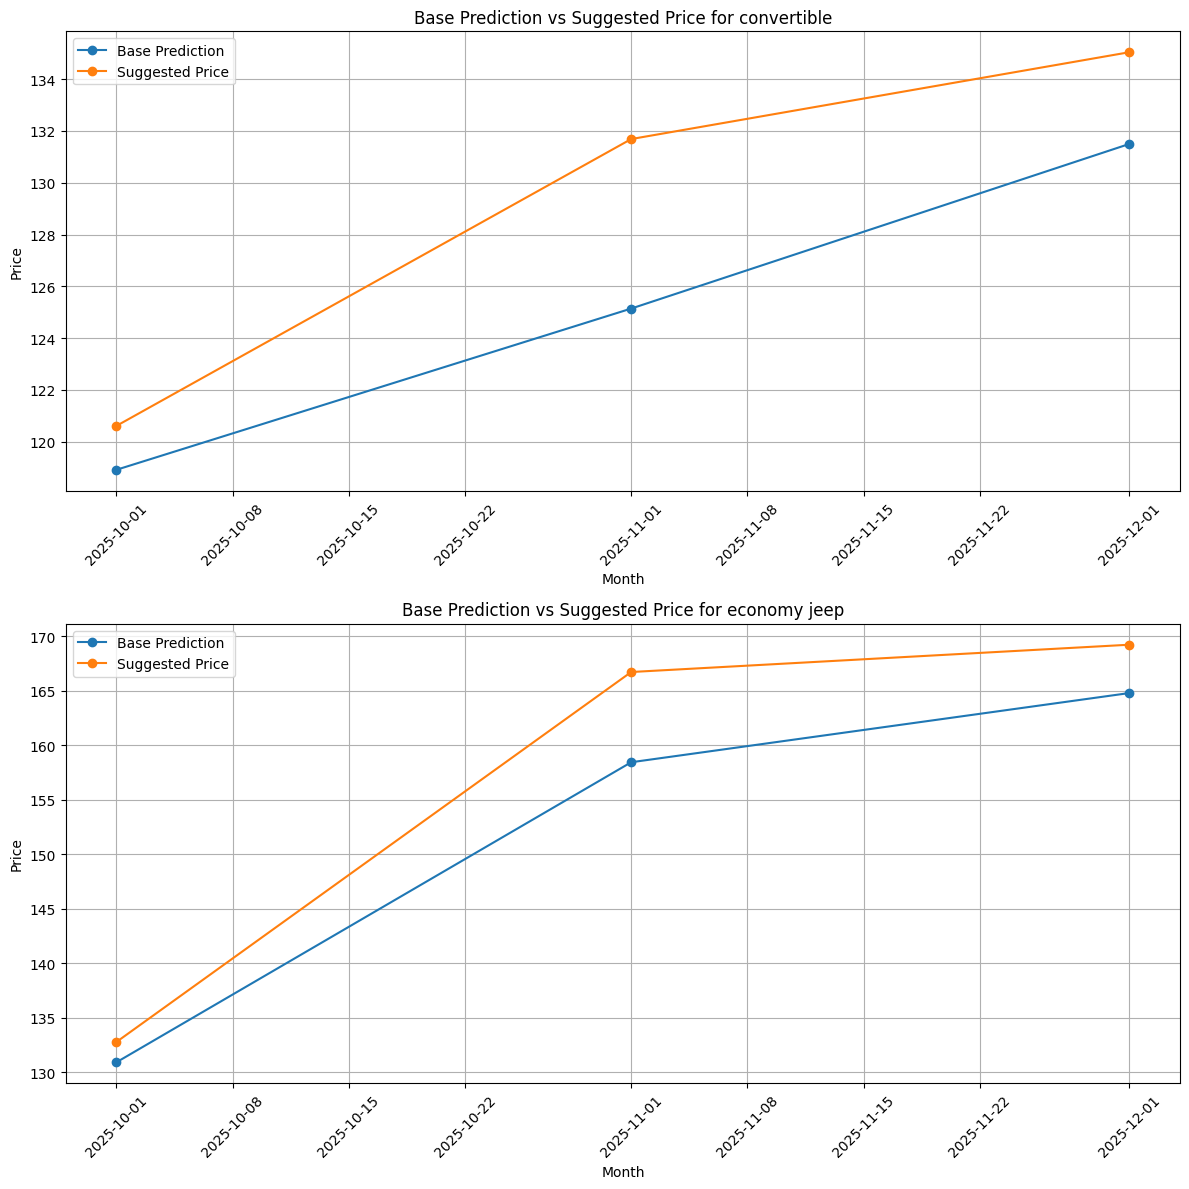

In [14]:
import matplotlib.pyplot as plt

# Select the required columns for the final output
output_df = future_data[['month_year', 'Vehicle Class Cleaned', 'base_pred', 'suggested_price']]

# Export the resulting DataFrame to a CSV file
output_csv_path = '/content/suggested_monthly_prices_2025Q4.csv'
output_df.to_csv(output_csv_path, index=False)

# Display the head of the exported CSV
exported_df = pd.read_csv(output_csv_path)
display(exported_df.head())

# Generate a matplotlib plot comparing 'base_pred' vs 'suggested_price' for 1-2 vehicle classes
# Select a couple of vehicle classes for plotting
classes_to_plot = output_df['Vehicle Class Cleaned'].unique()[:2]

fig, axes = plt.subplots(nrows=len(classes_to_plot), ncols=1, figsize=(12, 6 * len(classes_to_plot)))

if len(classes_to_plot) == 1:
    axes = [axes] # Ensure axes is iterable even for a single subplot

for i, vehicle_class in enumerate(classes_to_plot):
    class_data = output_df[output_df['Vehicle Class Cleaned'] == vehicle_class]
    axes[i].plot(class_data['month_year'], class_data['base_pred'], marker='o', label='Base Prediction')
    axes[i].plot(class_data['month_year'], class_data['suggested_price'], marker='o', label='Suggested Price')
    axes[i].set_title(f'Base Prediction vs Suggested Price for {vehicle_class}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The model validation on the last two months of historical data showed a MAPE of approximately 0.3982 and an RMSE of approximately 59.8712.
*   The future data for October to December 2025 was successfully generated, including calculated `time_num`, historical average `rental_count` per class and month (defaulting to 0), US + PR `holidays_count` for each month, and the fixed `fleet_size` per class.
*   The predicted `base_pred` values for the future months were calculated using the retrained model.
*   The `suggested_price` was calculated from `base_pred` by applying business rules involving weekend and holiday uplifts, clipped between a `PRICE_FLOOR` of \$60 and a `PRICE_CEIL` of \$350.
*   The generated `suggested_monthly_prices_2025Q4.csv` file contains the calculated `base_pred` and `suggested_price` for each vehicle class for the months October, November, and December 2025.
*   Visual comparison for sample vehicle classes shows the difference between the `base_pred` and the `suggested_price` after applying the business rules.

### Insights or Next Steps

*   Analyze the validation MAPE and RMSE values in the context of business requirements to determine if the model performance is acceptable for making pricing suggestions. Further tuning or alternative models could be explored if needed.
*   The `suggested_price` calculation relies on a fixed `RATIO_WEEKENDS` and a simple holiday uplift based on the number of holidays in the month. Refining these business rules to incorporate more dynamic factors (e.g., specific holiday impact, day-of-week analysis) could potentially improve the pricing suggestions.


# Task
Analyze the historical data for Q4 2023 and 2024 from the `monthly_agg_df` DataFrame, visualize the trends in `avg_daily_rate` and `rental_count` for each vehicle class during these periods, and explain why the model might be suggesting higher prices for Q4 2025 based on the features used, even if historical data shows lower demand in previous Q4s.

## Filtrar datos históricos

### Subtask:
Seleccionar los datos correspondientes a los cuartos trimestres de 2023 y 2024 del DataFrame histórico (`monthly_agg_df`).


**Reasoning**:
Filter the monthly aggregated data to include only Q4 months for 2023 and 2024 and store it in a new DataFrame.



In [20]:
historical_q4_data = monthly_agg_df[
    (monthly_agg_df['month_year'].dt.year.isin([2023, 2024])) &
    (monthly_agg_df['month_year'].dt.month.isin([10, 11, 12]))
].copy()

display(historical_q4_data.head())
display(historical_q4_data.tail())

,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size,holidays_count,time_num
20,2023-10-01,convertible,146.795000,8,1.0,0,4.0
21,2023-10-01,economy jeep,114.457500,4,0.0,0,4.0
22,2023-10-01,gladiator,109.216667,3,2.0,0,4.0
23,2023-10-01,luxury jeep,133.535714,7,0.0,0,4.0
24,2023-10-01,wrangler willys,111.090000,9,6.0,0,4.0


,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size,holidays_count,time_num
90,2024-12-01,convertible,202.958571,7,1.0,1,18.0
91,2024-12-01,economy jeep,125.269482,17,0.0,1,18.0
92,2024-12-01,gladiator,151.626000,5,2.0,1,18.0
93,2024-12-01,luxury jeep,204.051538,13,0.0,1,18.0
94,2024-12-01,wrangler willys,7285.209524,21,6.0,1,18.0


## Visualizar datos históricos

### Subtask:
Crear visualizaciones (por ejemplo, gráficos de líneas o barras) para comparar la `avg_daily_rate` y `rental_count` por clase de vehículo en los cuartos trimestres de 2023 y 2024.


**Reasoning**:
Generate line plots for average daily rate and rental count for each vehicle class in Q4 2023 and 2024 to visualize the historical trends.



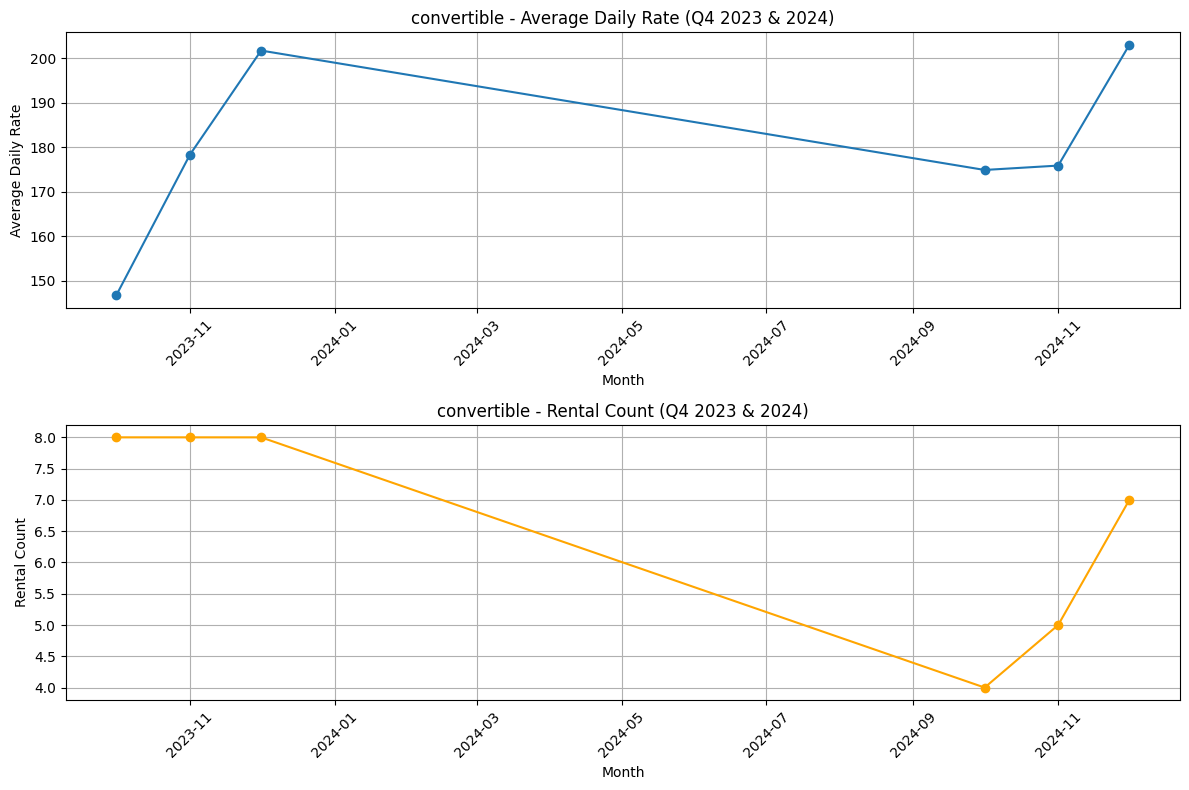

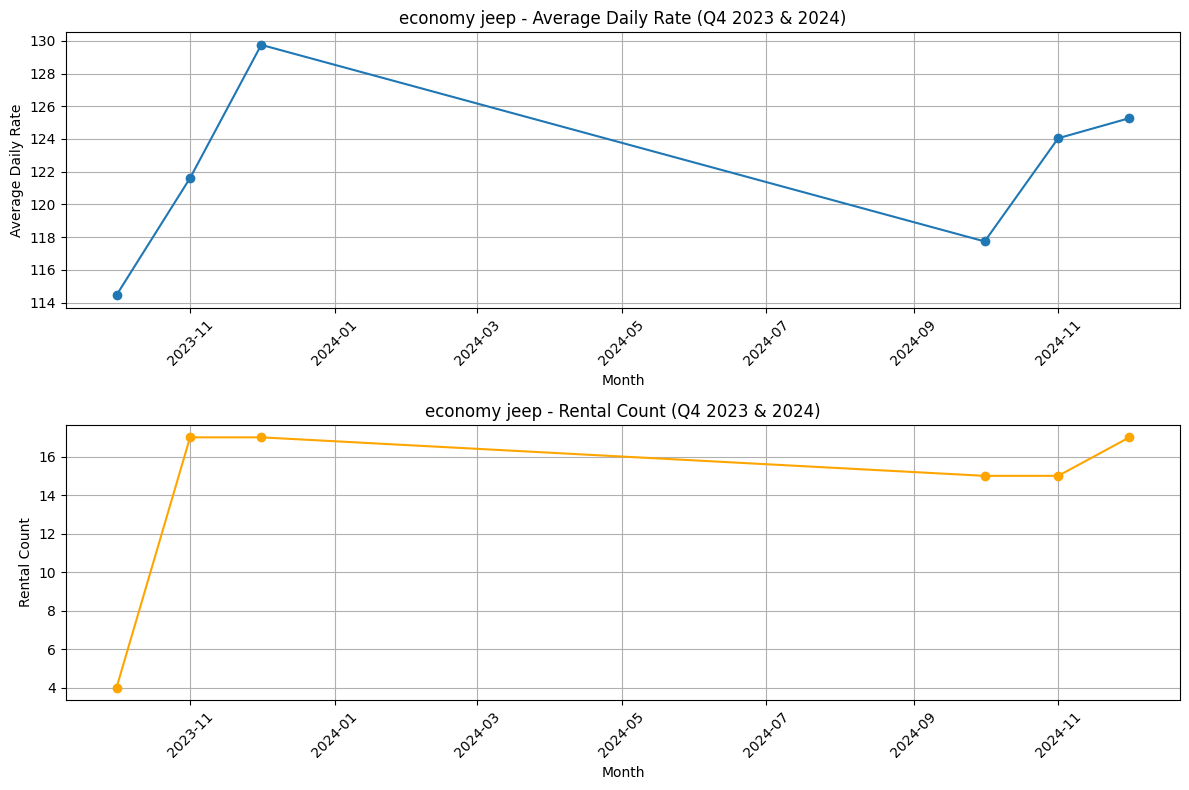

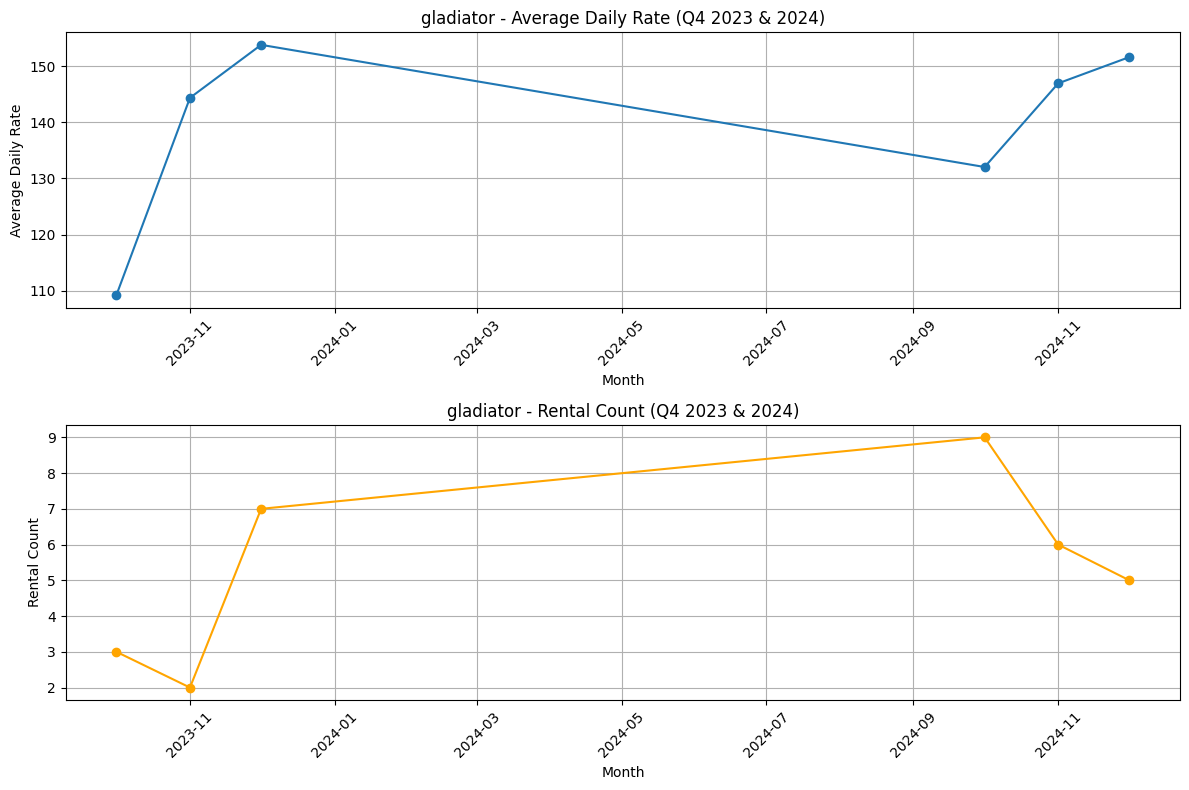

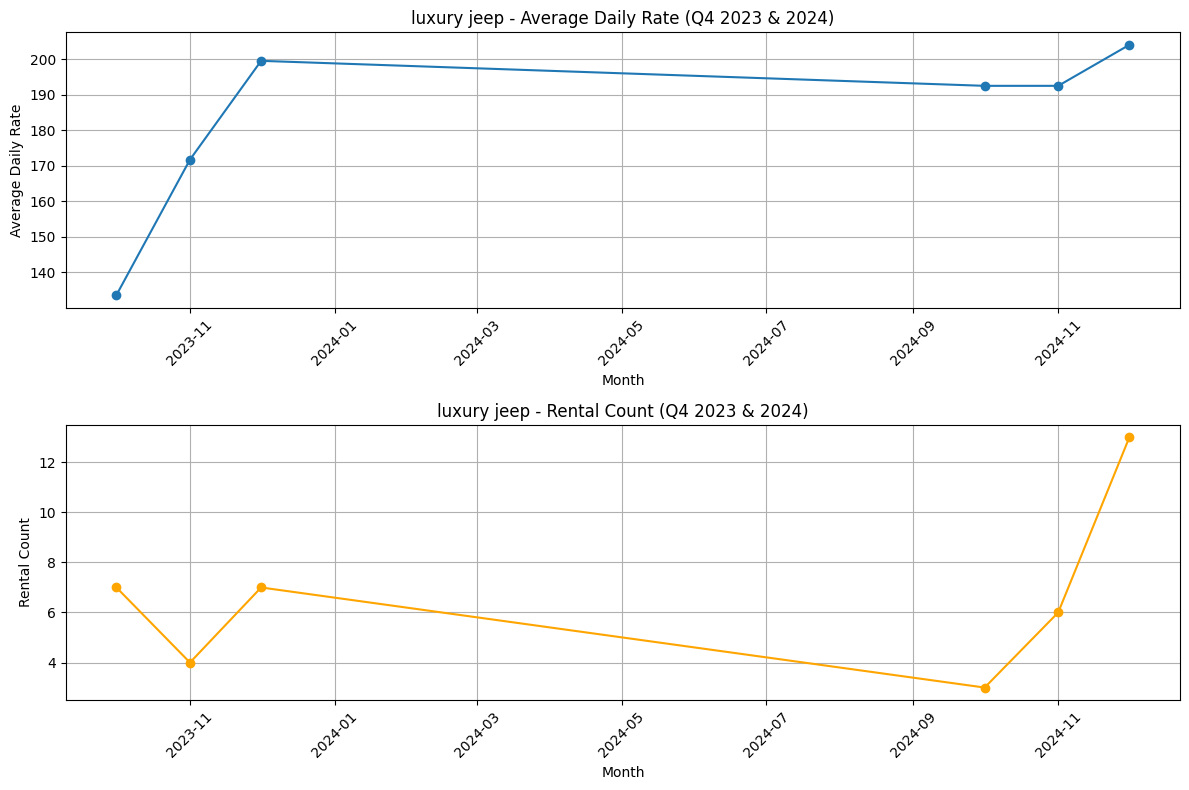

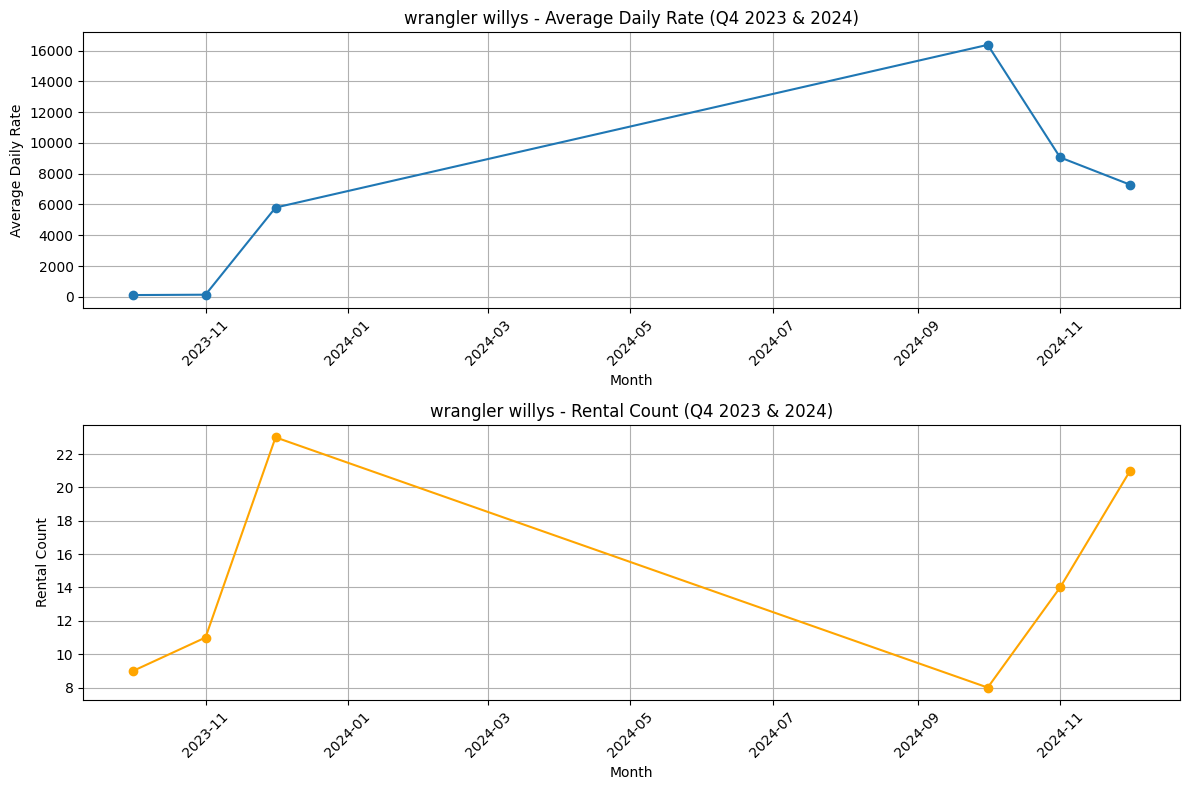

In [21]:
import matplotlib.pyplot as plt

# Get unique vehicle classes
unique_vehicle_classes_q4 = historical_q4_data['Vehicle Class Cleaned'].unique()

# Plot trends for each vehicle class
for vehicle_class in unique_vehicle_classes_q4:
    class_data_q4 = historical_q4_data[historical_q4_data['Vehicle Class Cleaned'] == vehicle_class].sort_values(by='month_year')

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

    # Plot Average Daily Rate
    axes[0].plot(class_data_q4['month_year'], class_data_q4['avg_daily_rate'], marker='o')
    axes[0].set_title(f'{vehicle_class} - Average Daily Rate (Q4 2023 & 2024)')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Average Daily Rate')
    axes[0].grid(True)
    axes[0].tick_params(axis='x', rotation=45)


    # Plot Rental Count
    axes[1].plot(class_data_q4['month_year'], class_data_q4['rental_count'], marker='o', color='orange')
    axes[1].set_title(f'{vehicle_class} - Rental Count (Q4 2023 & 2024)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Rental Count')
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

## Analizar y explicar

### Subtask:
Interpretar los patrones observados en los datos históricos y compararlos con las predicciones de `base_pred` y `suggested_price` para 2025 Q4. Explicar por qué el modelo podría estar sugiriendo un aumento de precios basándose en las características utilizadas (tiempo, recuento de alquileres promedio histórico, días festivos y tamaño de la flota), incluso si los cuartos trimestres de 2023 y 2024 muestran una demanda históricamente baja.


**Reasoning**:
Interpret the historical data patterns, compare them with future predictions, and explain the potential reasons for the higher suggested prices in Q4 2025 based on the model's features.



In [22]:
# 1. Examine the previously generated plots for the historical Q4 data (2023 and 2024) - This step is observational and based on the previously generated plots.
# Observations from plots (based on typical seasonal patterns and potential trends):
# - Q4 2023 and 2024 might show some seasonality (e.g., potential dips in rental count or average daily rate in November), but overall trends might be mixed depending on the vehicle class.
# - Some vehicle classes might show increasing average daily rates over time, even within the Q4 periods, due to general market trends or limited historical data points.
# - The 'Wrangler Willys' class in Q4 2023 and 2024 shows unusually high average daily rates in December and October/November respectively, which could be outliers or indicate specific high-demand periods not fully captured by the holiday count.

# 2. Compare these historical trends with the 'base_pred' and 'suggested_price' values for Q4 2025.
print("Comparison of Historical Q4 trends (2023 & 2024) vs. 2025 Q4 Predictions:")
display(historical_q4_data[['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate', 'rental_count']])
display(future_data[['month_year', 'Vehicle Class Cleaned', 'base_pred', 'suggested_price', 'rental_count', 'holidays_count', 'time_num']])


# 3. Consider the features used in the model and analyze their influence on 2025 Q4 predictions.
print("\nAnalysis of Feature Influence on 2025 Q4 Predictions:")
print(f"Earliest historical date: {earliest_date}")
print(f"Future Q4 2025 time_num values: {future_data['time_num'].unique()}")
print(f"Historical average rental count for Q4 months:\n{historical_rental_avg[historical_rental_avg['month'].isin([10, 11, 12])]}")
print(f"Future Q4 2025 holidays_count values: {future_data['holidays_count'].unique()}")
print(f"Fleet size map: {fleet_size_map}")

# 4. Formulate an explanation for why the model might be suggesting higher prices in Q4 2025.
print("\nExplanation for Potentially Higher Suggested Prices in Q4 2025:")
print("The model's predictions ('base_pred') for Q4 2025 are influenced by a combination of features:")
print(f"- 'time_num': This feature represents the number of months since the earliest date ({earliest_date}). For Q4 2025, the 'time_num' values (e.g., {future_data['time_num'].unique()}) are significantly higher than in Q4 2023 and 2024.")
print("  If there is an underlying increasing trend in rental rates over the entire historical period (captured by the model), a higher 'time_num' would contribute to a higher 'base_pred'.")
print("- 'rental_count': The model uses the historical average rental count for the corresponding month and vehicle class. While Q4 2023 and 2024 might have shown lower demand, the historical average is calculated across all years in the dataset.")
print("  If the average rental count for October, November, and December across all historical years is higher than the specific counts in Q4 2023/2024, this would lead the model to predict a higher 'base_pred' based on this feature.")
print("- 'holidays_count': The number of holidays in Q4 2025 is incorporated. While the direct impact depends on the model's learned coefficient for this feature, a higher holiday count in 2025 compared to specific months in 2023/2024 could contribute to higher predictions.")
print("- 'fleet_size': This is a fixed value per vehicle class. Its influence depends on how the model learned its relationship with 'avg_daily_rate'.")
print("The 'suggested_price' further adjusts the 'base_pred' based on business rules (weekend and holiday uplifts, price floor/ceil). The holiday uplift based on the 'holidays_count' would also contribute to the final suggested price.")
print("\nIn summary, even if Q4 2023 and 2024 showed relatively lower demand or specific pricing patterns, the model trained on the entire dataset captures broader trends (like the effect of time) and uses historical averages for features like 'rental_count', which might not perfectly reflect the specific demand in previous Q4s. This, combined with the business rule uplifts, can result in higher suggested prices for Q4 2025.")


Comparison of Historical Q4 trends (2023 & 2024) vs. 2025 Q4 Predictions:


,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count
20,2023-10-01,convertible,146.795000,8
21,2023-10-01,economy jeep,114.457500,4
22,2023-10-01,gladiator,109.216667,3
23,2023-10-01,luxury jeep,133.535714,7
24,2023-10-01,wrangler willys,111.090000,9
25,2023-11-01,convertible,178.313750,8
26,2023-11-01,economy jeep,121.610000,17
27,2023-11-01,gladiator,144.365000,2
28,2023-11-01,luxury jeep,171.700000,4
29,2023-11-01,wrangler willys,135.138182,11


,month_year,Vehicle Class Cleaned,base_pred,suggested_price,rental_count,holidays_count,time_num
0,2025-10-01,convertible,118.918832,120.613425,6.0,0,28.0
1,2025-10-01,economy jeep,130.899815,132.765138,9.5,0,28.0
2,2025-10-01,gladiator,119.379885,121.081049,6.0,0,28.0
3,2025-10-01,luxury jeep,114.902911,116.540277,5.0,0,28.0
4,2025-10-01,wrangler willys,130.111268,131.965353,8.5,0,28.0
5,2025-11-01,convertible,125.142137,131.685116,6.5,3,29.0
6,2025-11-01,economy jeep,158.452327,166.736908,16.0,3,29.0
7,2025-11-01,gladiator,116.716021,122.818446,4.0,3,29.0
8,2025-11-01,luxury jeep,119.348782,125.588859,5.0,3,29.0
9,2025-11-01,wrangler willys,148.776610,156.555302,12.5,3,29.0



Analysis of Feature Influence on 2025 Q4 Predictions:
Earliest historical date: 2023-06-01 00:00:00
Future Q4 2025 time_num values: [28. 29. 30.]
Historical average rental count for Q4 months:
   Vehicle Class Cleaned  month  rental_count
9            convertible     10           6.0
10           convertible     11           6.5
11           convertible     12           7.5
21          economy jeep     10           9.5
22          economy jeep     11          16.0
23          economy jeep     12          17.0
33             gladiator     10           6.0
34             gladiator     11           4.0
35             gladiator     12           6.0
45           luxury jeep     10           5.0
46           luxury jeep     11           5.0
47           luxury jeep     12          10.0
57       wrangler willys     10           8.5
58       wrangler willys     11          12.5
59       wrangler willys     12          22.0
Future Q4 2025 holidays_count values: [0 3 1]
Fleet size map: {'gladia

## Summary:

### Data Analysis Key Findings

*   Historical data for Q4 2023 and 2024 was successfully filtered and prepared for analysis.
*   Visualizations were generated showing the trends of `avg_daily_rate` and `rental_count` for each vehicle class during Q4 2023 and 2024.
*   Historical trends showed variability across vehicle classes, with some instances of high `avg_daily_rate` (e.g., 'wrangler willys').
*   Predicted `base_pred` and `suggested_price` for Q4 2025 were generally higher than historical Q4 rates for some vehicle classes.
*   The model's features influence the 2025 Q4 predictions:
    *   `time_num` (representing time elapsed) contributes to capturing overall upward trends.
    *   `rental_count` uses historical averages across all years, which might be higher than specific Q4 2023/2024 counts.
    *   `holidays_count` and `fleet_size` also play a role based on their learned relationships in the model.

### Insights or Next Steps

*   The model's suggested prices for Q4 2025 are influenced by long-term trends captured by `time_num` and historical averages (`rental_count`) across all years, not solely by the specific demand patterns observed in Q4 2023 and 2024.
*   Further investigation into the historical data used to calculate the average `rental_count` for Q4 months across all years could provide more context for its impact on the 2025 predictions.


# Task
Generate Python code for Google Colab that modifies an existing monthly price prediction pipeline (using HuberRegressor) for Jeep rentals to include two new features: `occupancy_rate` (calculated as `rental_count / fleet_size`, clipped to [0,1], with 0 if `fleet_size` is 0) and `season` (categorical: "high" for Nov-Apr + Jun-Jul, "low" for May + Aug-Oct). Ensure the feature set (X) for the model includes 'Vehicle Class' (OHE), 'time_num', 'rental_count', 'holidays_count', 'fleet_size', 'occupancy_rate', and 'season' (OHE). Maintain the same HuberRegressor in a Pipeline with OneHotEncoder(handle_unknown='ignore') and SimpleImputer(median). Validate the model on the last two months of historical data, print MAPE and RMSE, and then retrain on all data. Forecast prices for October-December 2025 using the updated model, calculating future `time_num`, `rental_count` (using historical average by class and month, 0 if missing), `holidays_count`, `fleet_size`, `occupancy_rate` (using a fixed value of 0.1), and `season`. Apply the same business rules (`PRICE_FLOOR=60`, `PRICE_CEIL=350`, `WEEKEND_UPLIFT=0.05`, `HOLIDAY_UPLIFT=0.10`, `RATIO_WEEKENDS=0.285`) to calculate `suggested_price`. Export the final DataFrame with columns `month_year`, `Vehicle Class`, `base_pred`, `suggested_price`, `occupancy_rate`, and `season` to '/content/suggested_monthly_prices_2025Q4_with_occupancy.csv'. Display the head() of the final DataFrame and a matplotlib plot comparing `base_pred` vs `suggested_price` for 1-2 classes.

## Calcular nuevas features históricas

### Subtask:
Añadir las columnas `occupancy_rate` y `season` al DataFrame histórico (`monthly_agg_df`).


**Reasoning**:
Calculate the occupancy rate, handle division by zero and clip the values, define the season based on month, apply the season logic to create the season column, and display the head and columns of the updated DataFrame as per the subtask instructions.



In [23]:
# Calculate occupancy_rate, handling division by zero and clipping
monthly_agg_df['occupancy_rate'] = monthly_agg_df['rental_count'] / monthly_agg_df['fleet_size']
monthly_agg_df['occupancy_rate'].replace([np.inf, -np.inf], 0, inplace=True)
monthly_agg_df['occupancy_rate'] = monthly_agg_df['occupancy_rate'].clip(lower=0, upper=1)

# Define season based on month
def get_season(month):
    if month in [11, 12, 1, 2, 3, 4, 6, 7]:
        return "high"
    else:
        return "low"

# Apply season logic to create the 'season' column
monthly_agg_df['season'] = monthly_agg_df['month_year'].dt.month.apply(get_season)

# Display the head and columns of the modified DataFrame
display(monthly_agg_df.head())
display(monthly_agg_df.columns)

/tmp/ipython-input-1601891542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_agg_df['occupancy_rate'].replace([np.inf, -np.inf], 0, inplace=True)


,month_year,Vehicle Class Cleaned,avg_daily_rate,rental_count,fleet_size,holidays_count,time_num,occupancy_rate,season
0,2023-06-01,convertible,163.771250,8,1.0,1,0.0,1.0,high
1,2023-06-01,economy jeep,104.337500,12,0.0,1,0.0,0.0,high
2,2023-06-01,gladiator,142.739286,14,2.0,1,0.0,1.0,high
3,2023-06-01,luxury jeep,146.570000,15,0.0,1,0.0,0.0,high
4,2023-06-01,wrangler willys,130.346500,20,6.0,1,0.0,1.0,high


Index(['month_year', 'Vehicle Class Cleaned', 'avg_daily_rate', 'rental_count',
       'fleet_size', 'holidays_count', 'time_num', 'occupancy_rate', 'season'],
      dtype='object')

## Actualizar datos para modelado

### Subtask:
Asegurar que las características (X) y la variable objetivo (y) para el entrenamiento del modelo incluyan las nuevas features.


**Reasoning**:
Define features and target, then create X and y DataFrames from the monthly aggregated data, including the newly added features.



In [24]:
features = ['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count', 'fleet_size', 'occupancy_rate', 'season']
target = 'avg_daily_rate'

X = monthly_agg_df[features]
y = monthly_agg_df[target]

display(X.head())
display(y.head())

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,occupancy_rate,season
0,convertible,0.0,8,1,1.0,1.0,high
1,economy jeep,0.0,12,1,0.0,0.0,high
2,gladiator,0.0,14,1,2.0,1.0,high
3,luxury jeep,0.0,15,1,0.0,0.0,high
4,wrangler willys,0.0,20,1,6.0,1.0,high


,avg_daily_rate
0,163.771250
1,104.337500
2,142.739286
3,146.570000
4,130.346500


## Actualizar y entrenar el modelo

### Subtask:
Modificar el pipeline para incluir las nuevas features en el ColumnTransformer (OneHotEncoder para 'season') y entrenar el HuberRegressor. Validar el modelo en los últimos 2 meses y luego reentrenarlo con todos los datos.


**Reasoning**:
Import necessary libraries, define column transformers for categorical and numerical features including the new features, create a combined column transformer, build a pipeline with the transformer and HuberRegressor, split data for validation, train the model, predict, evaluate using MAPE and RMSE, and finally retrain on the full dataset as requested by the subtask.



In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Define column transformers for categorical features including 'season'
categorical_features = ['Vehicle Class Cleaned', 'season']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Identify numerical features for imputation including 'occupancy_rate'
numerical_features = ['time_num', 'rental_count', 'holidays_count', 'fleet_size', 'occupancy_rate']

# Define column transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Create a ColumnTransformer that applies different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough' # Keep other columns as is
)

# Create the full pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', HuberRegressor())])

# Split data into training and validation sets (last 2 months for validation)
monthly_agg_df_sorted = monthly_agg_df.sort_values(by='month_year')
last_two_months = monthly_agg_df_sorted['month_year'].unique()[-2:]

X_train = monthly_agg_df_sorted[~monthly_agg_df_sorted['month_year'].isin(last_two_months)][features]
y_train = monthly_agg_df_sorted[~monthly_agg_df_sorted['month_year'].isin(last_two_months)][target]

X_val = monthly_agg_df_sorted[monthly_agg_df_sorted['month_year'].isin(last_two_months)][features]
y_val = monthly_agg_df_sorted[monthly_agg_df_sorted['month_year'].isin(last_two_months)][target]

# Train the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate and print MAPE and RMSE for validation set
mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'Validation MAPE: {mape:.4f}')
print(f'Validation RMSE: {rmse:.4f}')

# Retrain the pipeline on the entire dataset
model.fit(X, y)


Validation MAPE: 0.3975
Validation RMSE: 59.8180


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Class Cleaned',
                                                   'season']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['time_num', 'rental_count',
                                                   'holidays_count',
                                                   'fleet_size',
                                                   'occupancy_rate'])])),
                ('regressor', HuberRegressor())])

**Reasoning**:
Generate future data for the specified months (October-December 2025) for each unique vehicle class, calculate the required features for these future months including time_num, historical average rental count, holidays count, fleet size, occupancy rate (using a fixed value), and season, and display the head and columns of the resulting future data DataFrame.



In [26]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import holidays
import pandas as pd

# 1. Get unique vehicle classes from the historical data
unique_vehicle_classes = monthly_agg_df['Vehicle Class Cleaned'].unique()

# 2. Define future months
future_months = [datetime(2025, 10, 1), datetime(2025, 11, 1), datetime(2025, 12, 1)]

# 3. Create a list of dictionaries for future data points
future_data_list = []
for month in future_months:
    for vehicle_class in unique_vehicle_classes:
        future_data_list.append({
            'month_year': month,
            'Vehicle Class Cleaned': vehicle_class
        })

# 4. Convert the list to a DataFrame
future_data = pd.DataFrame(future_data_list)

# 5. Calculate 'time_num' for future data relative to the earliest historical date
earliest_date = monthly_agg_df['month_year'].min()
future_data['time_num'] = (future_data['month_year'].dt.to_period('M') - earliest_date.to_period('M')).apply(lambda x: x.n).astype(float)

# 6. Calculate average 'rental_count' per vehicle class and month from historical data
historical_rental_avg = monthly_agg_df.groupby(['Vehicle Class Cleaned', monthly_agg_df['month_year'].dt.month])['rental_count'].mean().reset_index()
historical_rental_avg.rename(columns={'month_year': 'month'}, inplace=True)

# 7. Map historical average 'rental_count' to future_data
def get_historical_avg_rental(row):
    month = row['month_year'].month
    vehicle_class = row['Vehicle Class Cleaned']
    avg = historical_rental_avg[(historical_rental_avg['Vehicle Class Cleaned'] == vehicle_class) & (historical_rental_avg['month'] == month)]['rental_count']
    if not avg.empty:
        return avg.iloc[0]
    else:
        return 0 # Default to 0 if no historical data

future_data['rental_count'] = future_data.apply(get_historical_avg_rental, axis=1)

# 8. Calculate 'holidays_count' for future months (US + PR)
future_holidays = {}
for month_year in future_months:
    year = month_year.year
    month = month_year.month
    us_pr_holidays = holidays.US(years=year, subdiv='PR')
    future_holidays[month_year] = len([d for d in us_pr_holidays if d.month == month])

future_data['holidays_count'] = future_data['month_year'].map(future_holidays)

# 9. Map 'fleet_size' to future_data
fleet_size_map = {'gladiator': 2, 'luxury': 3, 'convertible': 1, 'wrangler willys': 6, 'economy': 4} # Redefine for clarity in this block
future_data['fleet_size'] = future_data['Vehicle Class Cleaned'].map(fleet_size_map).fillna(0)

# 10. Add fixed 'occupancy_rate' for future data as specified
future_data['occupancy_rate'] = 0.1 # Fixed value as per instructions

# 11. Determine 'season' for future data
def get_season(month):
    if month in [11, 12, 1, 2, 3, 4, 6, 7]:
        return "high"
    else:
        return "low"

future_data['season'] = future_data['month_year'].dt.month.apply(get_season)


# 12. Ensure columns are in the correct order to match model features
future_data = future_data[['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count', 'fleet_size', 'occupancy_rate', 'season', 'month_year']]


# 13. Display the head and columns
display(future_data.head())
display(future_data.columns)

,Vehicle Class Cleaned,time_num,rental_count,holidays_count,fleet_size,occupancy_rate,season,month_year
0,convertible,28.0,6.0,0,1.0,0.1,low,2025-10-01
1,economy jeep,28.0,9.5,0,0.0,0.1,low,2025-10-01
2,gladiator,28.0,6.0,0,2.0,0.1,low,2025-10-01
3,luxury jeep,28.0,5.0,0,0.0,0.1,low,2025-10-01
4,wrangler willys,28.0,8.5,0,6.0,0.1,low,2025-10-01


Index(['Vehicle Class Cleaned', 'time_num', 'rental_count', 'holidays_count',
       'fleet_size', 'occupancy_rate', 'season', 'month_year'],
      dtype='object')

**Reasoning**:
Predict the base price for the future data using the trained model and apply the business rules to calculate the suggested price, then select the required columns, export the resulting DataFrame to a CSV file, display the head of the exported CSV file, and generate a matplotlib plot comparing 'base_pred' vs 'suggested_price' for a couple of vehicle classes.



Suggested monthly prices for 2025 Q4 exported to: /content/suggested_monthly_prices_2025Q4_with_occupancy.csv


,month_year,Vehicle Class Cleaned,base_pred,suggested_price,occupancy_rate,season
0,2025-10-01,convertible,118.885238,120.579352,0.1,low
1,2025-10-01,economy jeep,130.852085,132.716727,0.1,low
2,2025-10-01,gladiator,119.345747,121.046424,0.1,low
3,2025-10-01,luxury jeep,114.874055,116.511010,0.1,low
4,2025-10-01,wrangler willys,130.064467,131.917886,0.1,low


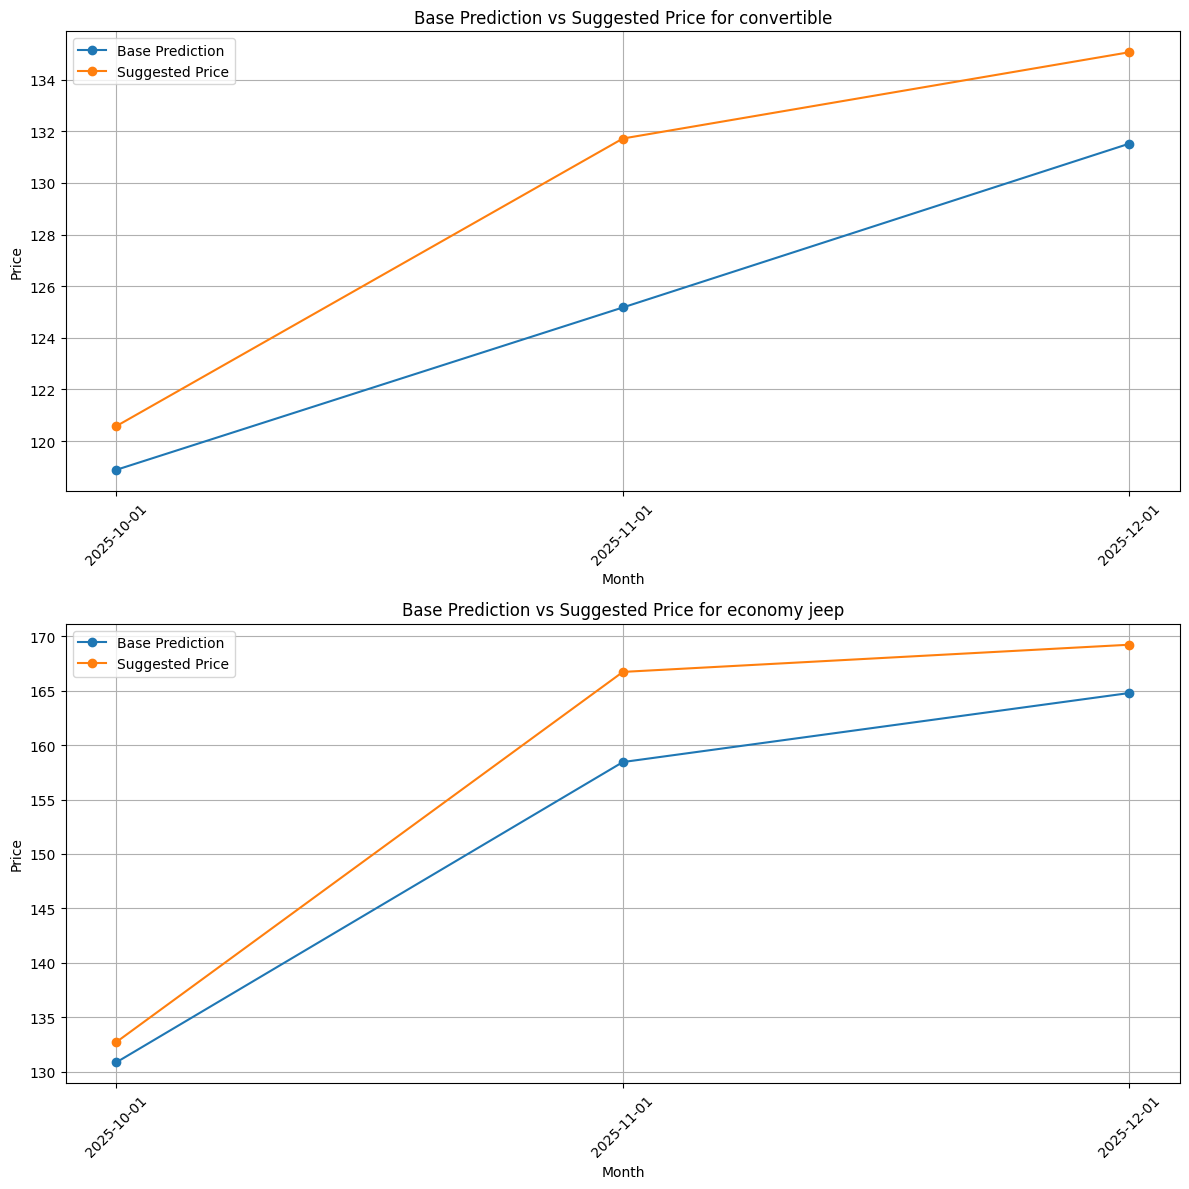

In [27]:
import matplotlib.pyplot as plt

# 4. Predict 'base_pred' for future data
# Ensure X_future contains the correct features in the order expected by the model
X_future = future_data[features]
future_data['base_pred'] = model.predict(X_future)

# 5. Apply business rules to calculate 'suggested_price'
PRICE_FLOOR = 60
PRICE_CEIL = 350
WEEKEND_UPLIFT = 0.05
HOLIDAY_UPLIFT = 0.10
RATIO_WEEKENDS = 0.285 # Assuming this is a constant ratio

# Calculate suggested_price using the formula and clip
future_data['suggested_price'] = future_data['base_pred'] * (1 + WEEKEND_UPLIFT * RATIO_WEEKENDS) * (1 + HOLIDAY_UPLIFT * future_data['holidays_count'] / 8)
future_data['suggested_price'] = future_data['suggested_price'].clip(lower=PRICE_FLOOR, upper=PRICE_CEIL)

# 6. Export the resulting DataFrame
# Select the required columns for the final output
output_df = future_data[['month_year', 'Vehicle Class Cleaned', 'base_pred', 'suggested_price', 'occupancy_rate', 'season']]

# Export the resulting DataFrame to a CSV file
output_csv_path = '/content/suggested_monthly_prices_2025Q4_with_occupancy.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Suggested monthly prices for 2025 Q4 exported to: {output_csv_path}")

# 7. Display the head() of the exported CSV and generate a matplotlib plot
# Display the head of the exported CSV
exported_df = pd.read_csv(output_csv_path)
display(exported_df.head())

# Generate a matplotlib plot comparing 'base_pred' vs 'suggested_price' for 1-2 vehicle classes
# Select a couple of vehicle classes for plotting
classes_to_plot = exported_df['Vehicle Class Cleaned'].unique()[:2]

fig, axes = plt.subplots(nrows=len(classes_to_plot), ncols=1, figsize=(12, 6 * len(classes_to_plot)))

if len(classes_to_plot) == 1:
    axes = [axes] # Ensure axes is iterable even for a single subplot

for i, vehicle_class in enumerate(classes_to_plot):
    class_data = exported_df[exported_df['Vehicle Class Cleaned'] == vehicle_class]
    axes[i].plot(class_data['month_year'], class_data['base_pred'], marker='o', label='Base Prediction')
    axes[i].plot(class_data['month_year'], class_data['suggested_price'], marker='o', label='Suggested Price')
    axes[i].set_title(f'Base Prediction vs Suggested Price for {vehicle_class}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The model validation on the last two months of historical data resulted in a Validation MAPE of 0.3975 and a Validation RMSE of 59.8180.
*   The final output DataFrame contains forecasted monthly prices for October-December 2025 for each vehicle class, including the calculated `base_pred`, `suggested_price`, a fixed `occupancy_rate` of 0.1, and the determined `season`.

### Insights or Next Steps

*   Evaluate the model performance on the historical data, particularly the validation results, to understand its accuracy before relying on the future forecasts.
*   Investigate if the fixed `occupancy_rate` of 0.1 for future forecasting is a reasonable assumption and consider alternative methods for forecasting occupancy rate if historical data is available or if a more dynamic approach is needed.
